<a href="https://colab.research.google.com/github/Panthisarang/ML_modeloOtimization/blob/main/Model_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cross-validation

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

Importing models


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Data Collection and preprocessing

In [ ]:
heart_data = pd.read_csv('/content/drive/MyDrive/heart_disease_data.csv')

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.shape

(303, 14)

In [ ]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1-> Defective Heart

0-> Healthy Heart

Splitting features and target

In [ ]:
X= heart_data.drop(columns='target', axis=1)
Y= heart_data['target']

In [ ]:
print(X)
print(Y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

##**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=3)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Comparing the performance of the models

In [ ]:
#list of models
models = [LogisticRegression(max_iter=1000), KNeighborsClassifier(), SVC(kernel='linear'), RandomForestClassifier()]

In [ ]:
def compare_models(models):
  for model in models:
    #training the model
    model.fit(X_train, Y_train)
    #evaluating the model
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print("Accuracy of the models",f'{model} : {accuracy}')

In [ ]:
compare_models(models)

Accuracy of the models LogisticRegression(max_iter=1000) : 0.7704918032786885
Accuracy of the models KNeighborsClassifier() : 0.6557377049180327
Accuracy of the models SVC(kernel='linear') : 0.7704918032786885
Accuracy of the models RandomForestClassifier() : 0.7704918032786885


##**Cross Validation**

Logistic Regression

In [ ]:
cv_score_lr= cross_val_score(LogisticRegression(max_iter=1000), X, Y, cv=5)
print(cv_score_lr)
mean_accracy_lr = cv_score_lr.mean()
print("Mean Accuracy of Logistic Regression", mean_accracy_lr*100)

[0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Mean Accuracy of Logistic Regression 82.82513661202186


In [ ]:
np.average(cv_score_lr)*100

82.82513661202186

Support vector classifier

In [ ]:
cv_score_svc= cross_val_score(SVC(kernel='linear'), X, Y, cv=5)
print(cv_score_svc)
mean_accracy_svc = cv_score_svc.mean()
print("Mean Accuracy of Support Vector Classifier", mean_accracy_svc*100)

[0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Mean Accuracy of Support Vector Classifier 82.83060109289619


K-nearest neighbours classifier

In [ ]:
cv_score_knn= cross_val_score(KNeighborsClassifier(), X, Y, cv=5)
print(cv_score_knn)
mean_accracy_knn = cv_score_knn.mean()
print("Mean Accuracy of K-nearest neighbours", mean_accracy_knn*100)

[0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Mean Accuracy of K-nearest neighbours 64.38797814207649


Random forest classifier

In [ ]:
cv_score_rf= cross_val_score(RandomForestClassifier(), X, Y, cv=5)
print(cv_score_rf)
mean_accracy_rf = cv_score_rf.mean()
print("Mean Accuracy of Random forest classifier", mean_accracy_rf*100)

[0.83606557 0.8852459  0.85245902 0.81666667 0.78333333]
Mean Accuracy of Random forest classifier 83.47540983606557


Creating a function to compare the models

In [ ]:
models= [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [ ]:
def compare_models(models):
  for model in models:
    #training the model
    cv_score= cross_val_score(model, X, Y, cv=5)
    #evaluating the model
    mean_accracy = cv_score.mean()
    print("Mean Accuracy of the models",f'{model} : {mean_accracy*100}')

In [ ]:
compare_models(models)

Mean Accuracy of the models LogisticRegression(max_iter=1000) : 82.82513661202186
Mean Accuracy of the models SVC(kernel='linear') : 82.83060109289619
Mean Accuracy of the models KNeighborsClassifier() : 64.38797814207649
Mean Accuracy of the models RandomForestClassifier() : 82.49726775956286


#Hyperparameter Tuning

1. GridSearchCV
2. RandomizedSearchCV

In [ ]:
#importing the dependencies
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

In [ ]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [ ]:
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data_frame.shape

(569, 30)

In [ ]:
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [ ]:
data_frame['label'] = breast_cancer_dataset.target

In [ ]:
data_frame['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

1-> Benign

0-> Malignant

Separating features and target

In [ ]:
X= data_frame.drop(columns='label', axis=1)
Y= data_frame['label']

In [ ]:
print(X)
print(Y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
X=np.array(X)
Y=np.array(Y)

##GridSearchCV

GridSearchCV is used for determining the best parameters for our model


In [ ]:
# loading the SVC model
model = SVC()

In [ ]:
#hyperparameters

parameters={
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'C':[1, 5, 10, 20]
}

In [ ]:
#grid search
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5)

In [ ]:
#fitting the data to our model
grid_search.fit(X, Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([2.14302964e+00, 4.14981842e-03, 5.02691269e-03, 1.61521435e-02,
        5.59885921e+00, 4.29444313e-03, 4.60028648e-03, 1.54936790e-02,
        4.66598539e+00, 4.44192886e-03, 4.25491333e-03, 1.44452095e-02,
        8.12872033e+00, 4.69532013e-03, 4.52413559e-03, 1.44531250e-02]),
 'std_fit_time': array([1.44383484e+00, 1.61767074e-04, 3.23627577e-04, 7.36962418e-04,
        2.53076759e+00, 3.13908656e-04, 1.21245447e-04, 1.44668290e-03,
        1.39310978e+00, 1.59297685e-04, 1.41088581e-04, 5.82939630e-04,
        2.64580122e+00, 9.75235861e-05, 3.09854810e-04, 7.94197265e-04]),
 'mean_score_time': array([0.00344253, 0.00137739, 0.00204554, 0.00420642, 0.00145211,
        0.00134649, 0.00177526, 0.00380616, 0.00124936, 0.0012363 ,
        0.00157824, 0.00372124, 0.00122294, 0.00123391, 0.00180035,
        0.00368891]),
 'std_score_time': array([4.50738822e-03, 4.29744843e-05, 1.94569930e-04, 1.09441244e-04,
        2.47072178e-04, 8.83065340e-05, 1.25302517e-

In [ ]:
#best parameters

best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 10, 'kernel': 'linear'}


In [ ]:
#highest accuracy

best_accuracy = grid_search.best_score_
print(best_accuracy)

0.9525694767893185


In [ ]:
#loading the results to pandas dataframe
result=pd.DataFrame(grid_search.cv_results_)

In [ ]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.143030,1.443835,0.003443,0.004507,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
1,0.004150,0.000162,0.001377,0.000043,1,poly,"{'C': 1, 'kernel': 'poly'}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,12
2,0.005027,0.000324,0.002046,0.000195,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,11
3,0.016152,0.000737,0.004206,0.000109,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,13
4,5.598859,2.530768,0.001452,0.000247,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2


In [ ]:
grid_search.best_estimator_

SVC(C=10, kernel='linear')

In [ ]:
grid_search_result= result[['param_C', 'param_kernel', 'mean_test_score']]

In [ ]:
print(grid_search_result)

   param_C param_kernel  mean_test_score
0        1       linear         0.945536
1        1         poly         0.908663
2        1          rbf         0.912172
3        1      sigmoid         0.460441
4        5       linear         0.950815
5        5         poly         0.922729
6        5          rbf         0.931501
7        5      sigmoid         0.411178
8       10       linear         0.952569
9       10         poly         0.920975
10      10          rbf         0.922714
11      10      sigmoid         0.402391
12      20       linear         0.949061
13      20         poly         0.919221
14      20          rbf         0.920944
15      20      sigmoid         0.398867


best parameters={'C': 10, 'kernel': 'linear'}

Highest accuracy=95.2%

##RandomizedSearchCV

In [ ]:
model = SVC()

In [ ]:
parameters={
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'C':[1, 5, 10, 20]
}

In [ ]:
classifier = RandomizedSearchCV(estimator=model, param_distributions=parameters, cv=5)

In [ ]:
classifier.fit(X, Y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [ ]:
classifier.cv_results_

{'mean_fit_time': array([3.33477497e-02, 3.21915627e-02, 9.02744961e+00, 4.77576256e-03,
        4.22339439e-03, 6.19936199e+00, 7.03611374e-03, 7.41066933e-03,
        8.22022390e+00, 1.46230221e-02]),
 'std_fit_time': array([4.75337871e-03, 1.32310515e-02, 3.39503399e+00, 1.60725460e-04,
        3.05606657e-04, 3.11261552e+00, 6.90102758e-04, 4.93263313e-04,
        3.21824874e+00, 6.90266835e-04]),
 'mean_score_time': array([0.0090673 , 0.0086534 , 0.00131249, 0.00133419, 0.00154853,
        0.00314145, 0.00310197, 0.00243869, 0.00155916, 0.00375948]),
 'std_score_time': array([5.03784414e-03, 6.04362088e-03, 4.29518835e-04, 9.68994820e-05,
        3.85742016e-04, 2.92813044e-03, 7.90081423e-04, 1.40743283e-04,
        3.42172331e-04, 5.52031641e-05]),
 'param_kernel': masked_array(data=['sigmoid', 'sigmoid', 'linear', 'poly', 'poly',
                    'linear', 'rbf', 'poly', 'linear', 'sigmoid'],
              mask=[False, False, False, False, False, False, False, False,
       

In [ ]:
best_parameters = classifier.best_params_
print(best_parameters)

{'kernel': 'linear', 'C': 10}


In [ ]:
highest_accuracy=classifier.best_score_
print(highest_accuracy)

0.9525694767893185


In [ ]:
result=pd.DataFrame(classifier.cv_results_)

In [ ]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033348,0.004753,0.009067,0.005038,sigmoid,1,"{'kernel': 'sigmoid', 'C': 1}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,8
1,0.032192,0.013231,0.008653,0.006044,sigmoid,5,"{'kernel': 'sigmoid', 'C': 5}",0.491228,0.421053,0.421053,0.350877,0.371681,0.411178,0.048578,9
2,9.027450,3.395034,0.001312,0.000430,linear,20,"{'kernel': 'linear', 'C': 20}",0.929825,0.956140,0.956140,0.938596,0.964602,0.949061,0.012816,3
3,0.004776,0.000161,0.001334,0.000097,poly,20,"{'kernel': 'poly', 'C': 20}",0.877193,0.921053,0.903509,0.938596,0.955752,0.919221,0.027300,6
4,0.004223,0.000306,0.001549,0.000386,poly,5,"{'kernel': 'poly', 'C': 5}",0.885965,0.912281,0.921053,0.938596,0.955752,0.922729,0.023689,4


In [ ]:
random_search_result= result[['param_C', 'param_kernel', 'mean_test_score']]

In [ ]:
print(random_search_result)

  param_C param_kernel  mean_test_score
0       1      sigmoid         0.460441
1       5      sigmoid         0.411178
2      20       linear         0.949061
3      20         poly         0.919221
4       5         poly         0.922729
5       5       linear         0.950815
6      20          rbf         0.920944
7       1         poly         0.908663
8      10       linear         0.952569
9      20      sigmoid         0.398867


best parameters={'C': 10, 'kernel': 'linear'}

Highest accuracy=95.2%

#Model Selection

Importing the dependencies


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [5]:
#importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [6]:
heart_data = pd.read_csv('/content/drive/MyDrive/heart_disease_data.csv')

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.shape

(303, 14)

In [ ]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 -> Defective heart

0 -> Healthy heart

Splitting the features

In [15]:
X= heart_data.drop(columns='target', axis=1)
Y= heart_data['target']

In [16]:
X= np.asarray(X)
Y= np.asarray(Y)

In [ ]:
print(X)
print(Y)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


##**Model selection**

1. Comparing the models with default hyperparamter values using Cross validation

In [7]:
#list of models
models = [LogisticRegression(max_iter=1000), KNeighborsClassifier(), SVC(kernel='linear'), RandomForestClassifier(random_state=0)]

In [8]:
def compare_models_cross_validation(models):
  for model in models:
    cv_score= cross_val_score(model, X, Y, cv=5)
    mean_accracy =round( cv_score.mean(),3)
    print('Cross validation accuracies for the ',model ,"=",cv_score)
    print("Mean Accuracy of the models",f'{model} : {mean_accracy*100}')
    print("----------------------------------------------------------------------------------")

In [22]:
compare_models_cross_validation(models)

Cross validation accuracies for the  LogisticRegression(max_iter=1000) = [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Mean Accuracy of the models LogisticRegression(max_iter=1000) : 82.8
----------------------------------------------------------------------------------
Cross validation accuracies for the  KNeighborsClassifier() = [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Mean Accuracy of the models KNeighborsClassifier() : 64.4
----------------------------------------------------------------------------------
Cross validation accuracies for the  SVC(kernel='linear') = [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Mean Accuracy of the models SVC(kernel='linear') : 82.8
----------------------------------------------------------------------------------
Cross validation accuracies for the  RandomForestClassifier(random_state=0) = [0.85245902 0.90163934 0.81967213 0.81666667 0.8       ]
Mean Accuracy of the models RandomForestClassifier(random_state=0) 

Inference: For the heart disease, **Random forest classifier** has the Highest accracy value with default hyperparamter values

2. Comparing the models with different hyperparameters values using GridSearchCV

In [10]:
models_list = [LogisticRegression(max_iter=10000), KNeighborsClassifier(), SVC(kernel='linear'), RandomForestClassifier(random_state=0)]

In [11]:
#creating a dictionary that contains hyperparameter values for the above mentioned models
model_params = {
    'LogisticRegression':{
        'C' : [1, 5,10,20]
        },
    'KNeighborsClassifier':{
        'n_neighbors' : [3, 5, 10]
        },
    'SVC':{
        'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [1, 5, 10, 20]
        },
    'RandomForestClassifier':{
        'n_estimators' : [10, 50, 100, 20]
        }
}

In [ ]:
type(model_params)

dict

In [ ]:
print(model_params.values())

dict_values([{'C': [1, 5, 10, 20]}, {'n_neighbors': [3, 5, 10]}, {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}, {'n_estimators': [10, 50, 100, 20]}])


In [12]:
model_keys=list(model_params.keys())
print(model_keys)

['LogisticRegression', 'KNeighborsClassifier', 'SVC', 'RandomForestClassifier']


In [ ]:
model_keys[0]

'LogisticRegression'

In [ ]:
model_params[model_keys[1]]

{'n_neighbors': [3, 5, 10]}

Applying GridSearchCV

In [23]:
def ModelSelection(models, model_parameters) :
  result =[]
  i=0
  for model in models:
    key=model_keys[i]
    params=model_parameters[key]
    i+=1
    print(model)
    print(params)
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5)
    grid_search.fit(X, Y)
    result.append({
        'model':model,
        'best_params':grid_search.best_params_,
        'best_score':grid_search.best_score_
    })
    result_dataframe=pd.DataFrame(result,columns=['Model used','Best Hyperparamters','Highestscore'])
  return result_dataframe

In [ ]:
model_selection = ModelSelection(models_list, model_params)
print(model_selection)

Random Forest Classifier with n_estimators=100 has the highest accuracy

#Accuracy Score and Confusion Matrix


importing the dependencies

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Data collection and pre processing


In [26]:
heart_data = pd.read_csv('/content/drive/MyDrive/heart_disease_data.csv')

In [27]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [29]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [30]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [31]:
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [32]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

Splitting the Data into Training data & Test Data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


Model Training

In [35]:
model = LogisticRegression(max_iter=1000)

In [36]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

##Model evaluation

###**Accuracy Score**

In [38]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on Training data : ', round(training_data_accuracy*100, 2), '%')

Accuracy on Training data :  85.54 %


In [39]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on Test data : ', round(test_data_accuracy*100, 2), '%')

Accuracy on Test data :  80.33 %


###**Confusion Matrix**

In [40]:
cf_matrix = confusion_matrix(Y_test, X_test_prediction)

print(cf_matrix)

[[22  6]
 [ 6 27]]


In [41]:
tn, fp, fn, tp = cf_matrix.ravel()

print(tn, fp, fn, tp)

22 6 6 27


<Axes: >

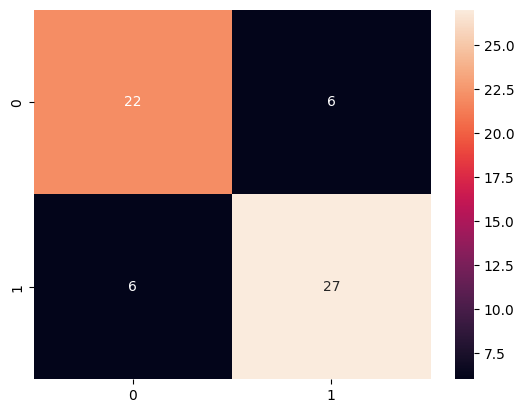

In [42]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

#Precision,Recall and F1 Score

Importing the Dependencies

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

Data Collection & Processing

In [44]:
heart_data = pd.read_csv('/content/drive/MyDrive/heart_disease_data.csv')

In [45]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

In [46]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

Model Training

In [48]:
model = LogisticRegression(max_iter=1000)

In [49]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

##Accuracy Score

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on Training data : ', round(training_data_accuracy*100, 2), '%')

Accuracy on Training data :  85.54 %


In [52]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on Test data : ', round(test_data_accuracy*100, 2), '%')

Accuracy on Test data :  80.33 %


##Precision

Precision is the ratio of number of True Positive to the total number of Predicted Positive. It measures, out of the total predicted positive, how many are actually positive.

In [53]:
from sklearn.metrics import precision_score

In [54]:
# precision for training data predictions
precision_train = precision_score(Y_train, X_train_prediction)
print('Training data Precision =', precision_train)

Training data Precision = 0.8299319727891157


In [55]:
# precision for test data predictions
precision_test = precision_score(Y_test, X_test_prediction)
print('Test data Precision =', precision_test)

Test data Precision = 0.8181818181818182


##Recall

Recall is the ratio of number of True Positive to the total number of Actual Positive. It measures, out of the total actual positive, how many are predicted as True Positive.

In [56]:
from sklearn.metrics import recall_score

In [57]:
# recall for training data predictions
recall_train = recall_score(Y_train, X_train_prediction)
print('Training data Recall =', recall_train)

Training data Recall = 0.9242424242424242


In [58]:
# recall for test data predictions
recall_test = recall_score(Y_test, X_test_prediction)
print('Test data Recall =', recall_test)

Test data Recall = 0.8181818181818182


##F1 Score

F1 Score is an important evaluation metric for binary classification that combines Precision & Recall. F1 Score is the harmonic mean of Precision & Recall.

In [59]:
from sklearn.metrics import f1_score

In [60]:
# F1 score for training data predictions
f1_score_train = f1_score(Y_train, X_train_prediction)
print('Training data F1 Score =', f1_score_train)

Training data F1 Score = 0.8745519713261649


In [61]:
# F1 Score for test data predictions
f1_score_test = recall_score(Y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)

Test data F1 Score = 0.8181818181818182


##**Precision, Recall, & F1 Score - function**

In [62]:
def precision_recall_f1_score(true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =',precision_value)
  print('Recall =',recall_value)
  print('F1 Score =',f1_score_value)

In [63]:
# classification metrics for training data
precision_recall_f1_score(Y_train, X_train_prediction)

Precision = 0.8299319727891157
Recall = 0.9242424242424242
F1 Score = 0.8745519713261649


In [64]:
# classification metrics for test data
precision_recall_f1_score(Y_test, X_test_prediction)

Precision = 0.8181818181818182
Recall = 0.8181818181818182
F1 Score = 0.8181818181818182
